In [14]:
import cv2
import imutils as imutils
import numpy as np
import os, sys
import shutil
from skimage import io
from skimage.metrics import structural_similarity
import matplotlib.pyplot as plt
import numpy as np

from ml.tools.normalisation.PanoStitcher import PanoStitcher
from ml.tools.normalisation.FeatureMap import FeatureMap

In [15]:
vidPath = 'C:\\Users\\killi\\Computing work\\trains\\trainvis\\ml\\img\\vid2pano'

lightPath = os.path.join(vidPath, 'light.mp4')
darkPath = os.path.join(vidPath, 'dark.mp4')

lightOut = os.path.join(vidPath, 'light\\')
darkOut = os.path.join(vidPath, 'dark\\')

In [16]:
lightVid = cv2.VideoCapture(lightPath)
darkVid = cv2.VideoCapture(darkPath)

In [17]:
lightFrames = []
darkFrames = []

for filename in os.listdir(lightOut):
    f = os.path.join(lightOut, filename)
    # checking if it is a file
    if os.path.isfile(f):
        lightFrames.append(f)

for filename in os.listdir(darkOut):
    f = os.path.join(darkOut, filename)
    # checking if it is a file
    if os.path.isfile(f):
        darkFrames.append(f)

lightFrames.sort(key=lambda x :  int("".join(filter(str.isdigit, os.path.basename(x)))))
darkFrames.sort(key=lambda x : int("".join(filter(str.isdigit, os.path.basename(x)))))

print([os.path.basename(i) for i in lightFrames])

['frame-0.jpg', 'frame-1.jpg', 'frame-2.jpg', 'frame-3.jpg', 'frame-4.jpg', 'frame-5.jpg', 'frame-6.jpg', 'frame-7.jpg', 'frame-8.jpg', 'frame-9.jpg', 'frame-10.jpg', 'frame-11.jpg', 'frame-12.jpg', 'frame-13.jpg', 'frame-14.jpg', 'frame-15.jpg', 'frame-16.jpg', 'frame-17.jpg', 'frame-18.jpg', 'frame-19.jpg', 'frame-20.jpg', 'frame-21.jpg', 'frame-22.jpg', 'frame-23.jpg', 'frame-24.jpg', 'frame-25.jpg', 'frame-26.jpg', 'frame-27.jpg', 'frame-28.jpg', 'frame-29.jpg', 'frame-30.jpg', 'frame-31.jpg', 'frame-32.jpg', 'frame-33.jpg', 'frame-34.jpg', 'frame-35.jpg', 'frame-36.jpg', 'frame-37.jpg', 'frame-38.jpg', 'frame-39.jpg', 'frame-40.jpg', 'frame-41.jpg', 'frame-42.jpg', 'frame-43.jpg', 'frame-44.jpg', 'frame-45.jpg', 'frame-46.jpg', 'frame-47.jpg', 'frame-48.jpg', 'frame-49.jpg', 'frame-50.jpg', 'frame-51.jpg', 'frame-52.jpg', 'frame-53.jpg', 'frame-54.jpg', 'frame-55.jpg', 'frame-56.jpg', 'frame-57.jpg', 'frame-58.jpg', 'frame-59.jpg', 'frame-60.jpg', 'frame-61.jpg', 'frame-62.jpg', '

chosen frames count:  107


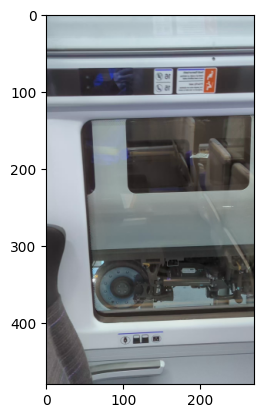

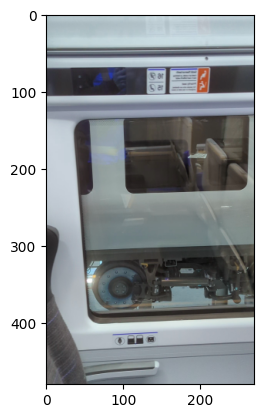

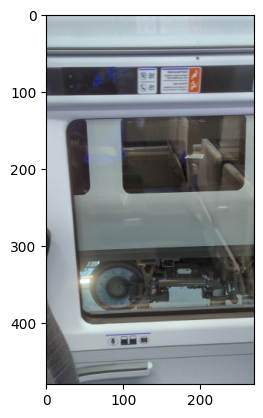

In [18]:
def preProcessIms(files):

    ims = []

    for name in files:
        nextIm = cv2.imread(name, cv2.COLOR_YUV2GRAY_420) # cv2.COLOR_YUV2GRAY_420 # cv2.IMREAD_GRAYSCALE
        # nextIm = cv2.rotate(nextIm, cv2.ROTATE_90_CLOCKWISE)

        scale_percent = 60 # % of original size
        w = int(nextIm.shape[1] * scale_percent / 100)
        h = int(nextIm.shape[0] * scale_percent / 100)

        dim = (w,h)
        # nextIm = cv2.resize(nextIm, dim, interpolation = cv2.INTER_AREA)
        ims.append(nextIm)

    return ims

skipIms = preProcessIms(lightFrames)[::3]
print('chosen frames count: ', len(skipIms))

plt.imshow(skipIms[0])
plt.show()

plt.imshow(skipIms[1])
plt.show()

plt.imshow(skipIms[2])
plt.show()

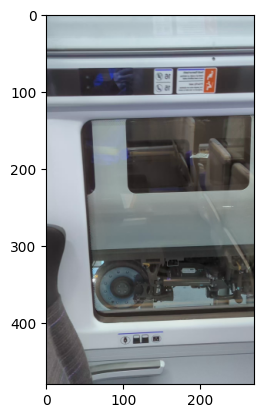

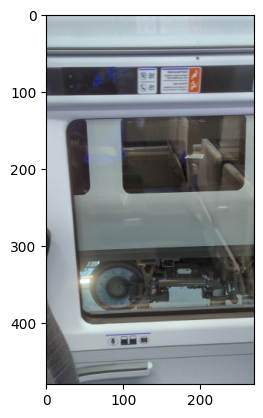

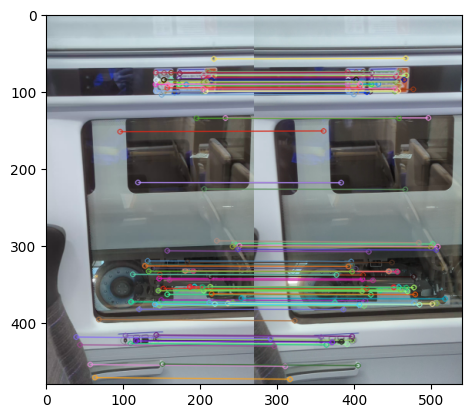

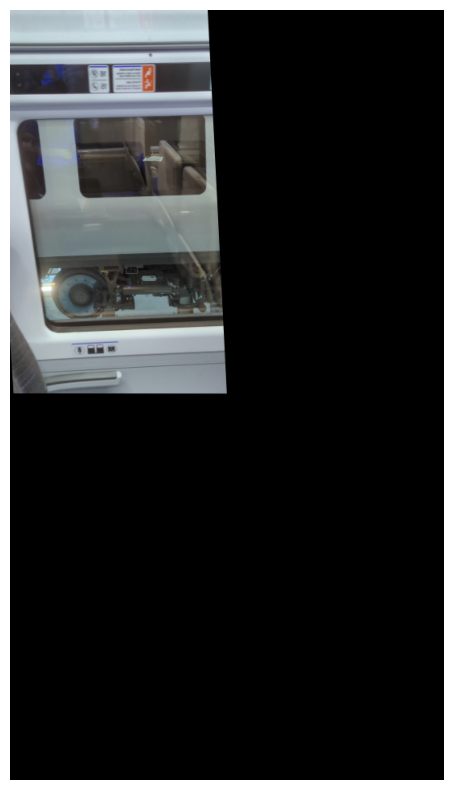

[[ 1.01372114e+00  6.79856941e-02 -2.79704942e+01]
 [ 2.02217712e-04  1.03424488e+00 -3.10497944e+00]
 [-1.80866447e-06  6.69996536e-05  1.00000000e+00]]
[< cv2.DMatch 000001885FA48E70>, < cv2.DMatch 000001885FA48F30>, < cv2.DMatch 000001885FA493B0>, < cv2.DMatch 000001885FA49050>, < cv2.DMatch 000001885FA48E90>, < cv2.DMatch 000001885FA49990>, < cv2.DMatch 000001885FA49410>, < cv2.DMatch 000001885FA488D0>, < cv2.DMatch 000001885FA49130>, < cv2.DMatch 000001885FA49250>, < cv2.DMatch 000001885FA49770>, < cv2.DMatch 000001885FA49C50>, < cv2.DMatch 000001885F987E30>, < cv2.DMatch 000001885FA49030>, < cv2.DMatch 000001885FA490D0>, < cv2.DMatch 000001885FA48950>, < cv2.DMatch 000001885FA49270>, < cv2.DMatch 000001885FA49370>, < cv2.DMatch 000001885FA490B0>, < cv2.DMatch 000001885FA493F0>, < cv2.DMatch 000001885FA49290>, < cv2.DMatch 000001885FA49C10>, < cv2.DMatch 000001885FA493D0>, < cv2.DMatch 000001885FA491B0>, < cv2.DMatch 000001885FA48730>, < cv2.DMatch 000001885FA48B90>, < cv2.DMatch 

In [19]:
# BELOW IS AN EXAMPLE OPERATION

feature_extractor = 'sift' # one of 'sift', 'surf', 'brisk', 'orb'
feature_matching = 'bf' # either 'bf' or 'knn'

frame1 = skipIms[0]
frame2 = skipIms[2]

plt.imshow(frame1)
plt.show()
plt.imshow(frame2)
plt.show()

kpA, featA = FeatureMap.detectAndDescribe(frame1, algo=feature_extractor)
kpB, featB = FeatureMap.detectAndDescribe(frame2, algo=feature_extractor)

if feature_matching == 'bf':
    matches = FeatureMap.matchKeyPointsBF(featA, featB, algo=feature_extractor)
    img3 = cv2.drawMatches(frame1,kpA,frame2,kpB,matches[:100],
                           None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
elif feature_matching == 'knn':
    matches = FeatureMap.matchKeyPointsKNN(featA, featB, ratio=0.75, algo=feature_extractor)
    img3 = cv2.drawMatches(frame1,kpA,frame2,kpB,np.random.choice(matches,100),
                           None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

(matches, homo, status) = FeatureMap.getHomography(kpA, kpB, matches, reprojThresh=4)
if (matches, homo, status) is None:
    print('no homo :(')

plt.imshow(img3)
plt.show()

result = cv2.warpPerspective(frame2, homo, (frame1.shape[1] + frame2.shape[1], frame1.shape[0] + frame2.shape[0]))
# result[0:frame1.shape[0], 0:frame1.shape[1]] = frame1

# result = warpImages(frame1, frame2, H)

plt.figure(figsize=(20,10))
plt.imshow(result)

plt.axis('off')
plt.show()

print(homo)
print(matches)

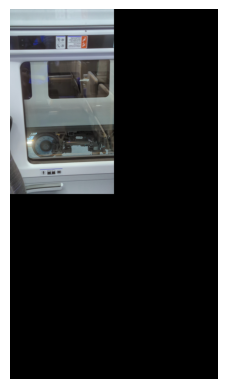

In [20]:
w = frame1.shape[1] + frame2.shape[1]
h = frame1.shape[0] + frame2.shape[0]

result = cv2.warpPerspective(frame1, homo, (w,h))
result[0:frame2.shape[0], 0:frame2.shape[1]] = frame2

plt.imshow(result)
plt.axis('off')
plt.show()

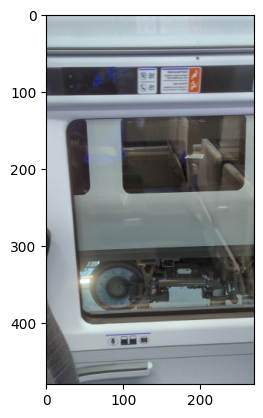

In [21]:
grey = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
# threshold the grey image
thresh = cv2.threshold(grey, 0, 255, cv2.THRESH_BINARY)[1]

# Finds contours from the binary image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# get the maximum contour area
c = max(cnts, key=cv2.contourArea)

# get a bbox from the contour area
(x, y, w, h) = cv2.boundingRect(c)

# crop the image to the bbox coordinates
result = result[y:y + h, x:x + w]

# show the cropped image
plt.imshow(result)
plt.show()

In [22]:
# very dumb continually adds to widening panorama
def stitcher(images : list, extractor : str, matcher : str):

    todo = list(images) # copy to preserve list
    completed = []
    currentStitch = None

    while len(completed) < images:

        nextFrame = todo[0]

        if currentStitch is None:
            currentStitch = todo[0]
            nextFrame = todo[1]
            todo.pop(0)

        nextIm = pstitcher.featureStitch(currentStitch, nextFrame) # defined below
        # plt.imshow(nextIm)
        # plt.axis('off')
        # plt.show()

        currentStitch = nextIm
        todo.pop(0)

    print(f'merged {len(completed)} images together')
    return currentStitch

In [23]:
# stitches every 2 images first
def zippedStitcher(images):

    todo = list(images) # copy to preserve list
    completed = []

    zipped = list(zip(todo[::2], todo[1::2]))

    for (frame1, frame2) in zipped:
        # plt.imshow(frame1)
        # plt.axis('off')
        # plt.show()
        #
        # plt.imshow(frame2)
        # plt.axis('off')
        # plt.show()

        nextIm = pstitcher.featureStitch(frame1, frame2) # defined below
        completed.append(nextIm)

    return completed

In [24]:
def imgIterator(ims):
    count = 0
    while count < len(ims):
        yield ims[count]
        count += 1

In [25]:
# built-in stitcher is terrible, do not use, but here's how

# stitcher = cv2.Stitcher_create() # cv2.Stitcher_PANORAMA
# stitcher.setPanoConfidenceThresh(0.4)
# status, stitched = stitcher.stitch(easy)
# if status == 0:
#     plt.imshow(stitched)
#     plt.axis('off')
#     plt.show()
# else:
#     print('built-in stitcher could not stitch :(')

107
53
26
13
6
3


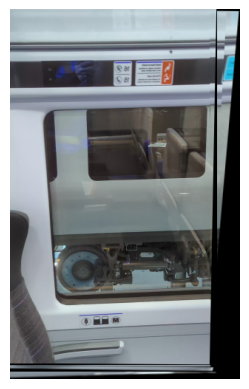

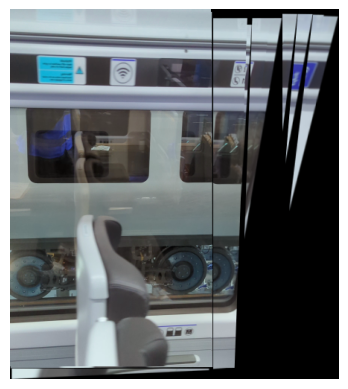

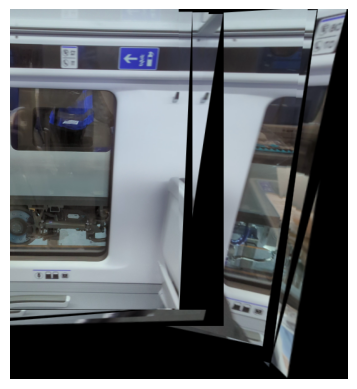

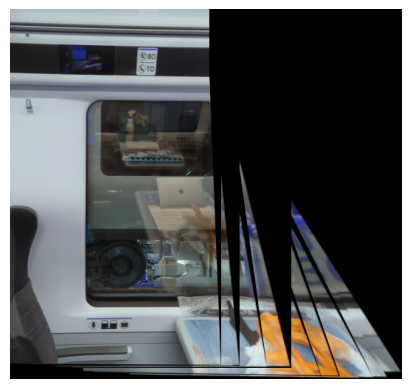

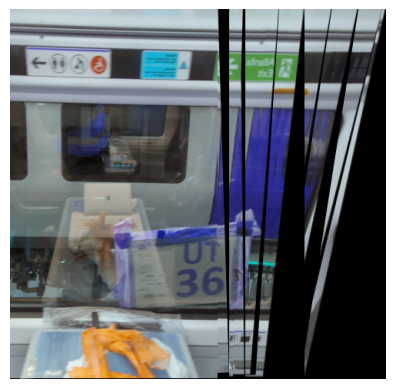

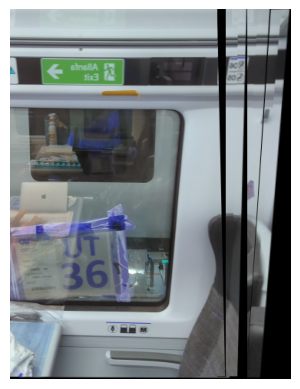

In [26]:
# final = stitcher(skipIms, 'orb', 'bf')
# plt.imshow(final)
# plt.axis('off')
# plt.show()

pstitcher = PanoStitcher('sift', 'bf')

merged = zippedStitcher( preProcessIms(lightFrames)[::3] )
print(len(skipIms))
print(len(merged))

merged2 = zippedStitcher(merged)
print(len(merged2))

merged3 = zippedStitcher(merged2)
print(len(merged3))

merged4 = zippedStitcher(merged3)
print(len(merged4))

merged5 = zippedStitcher(merged4)
print(len(merged5))

# plt.imshow(merged4[0])
# plt.axis('off')
# plt.show()

for im in merged4:
    plt.imshow(im)
    plt.axis('off')
    plt.show()